In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = skimage.io.imread('/content/drive/MyDrive/image.tif')

In [ ]:
image.shape

(1024, 1360)

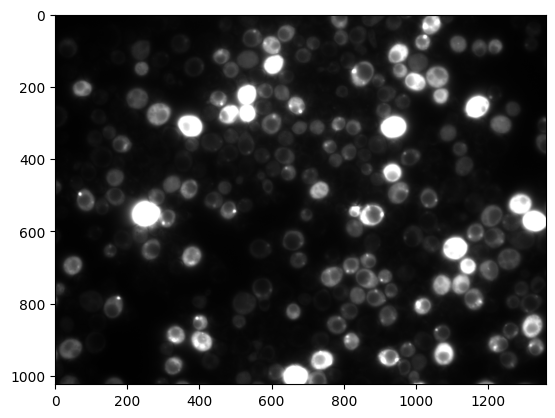

In [ ]:
plt.imshow(image,cmap='gray')

In [ ]:
image[0,0] = 2

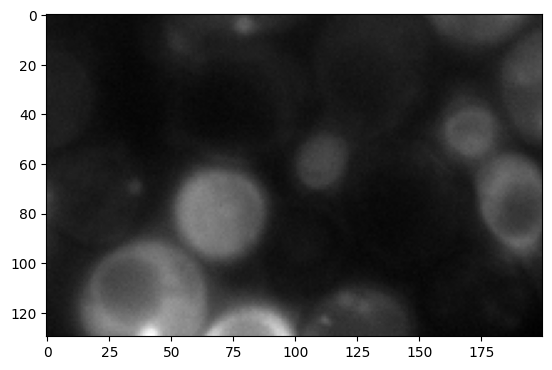

In [ ]:
cropped = image[400:530, 400:600]
plt.imshow(cropped,cmap='gray')

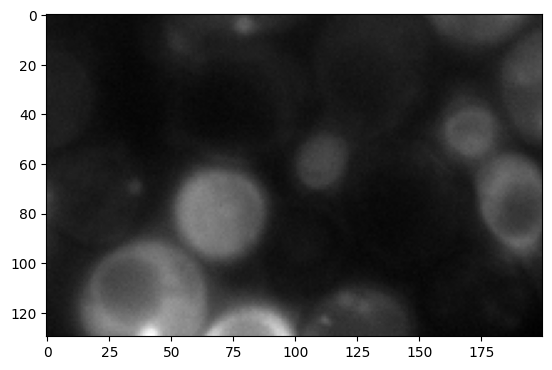

In [ ]:
cropped_plus_three = cropped+3
plt.imshow(cropped_plus_three,cmap='gray')

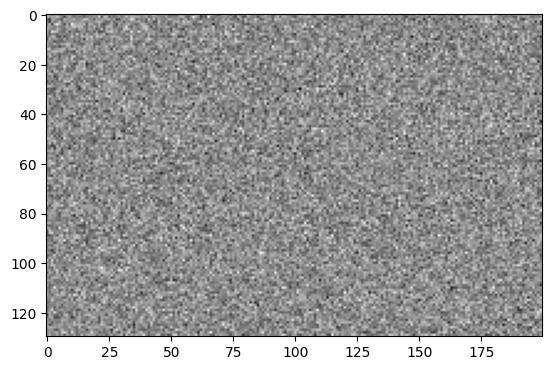

In [ ]:
#noise_image = np.random.poisson(lam=3,size=cropped.shape)
noise_image = np.random.normal(size=cropped.shape)
plt.imshow(noise_image,cmap='gray')

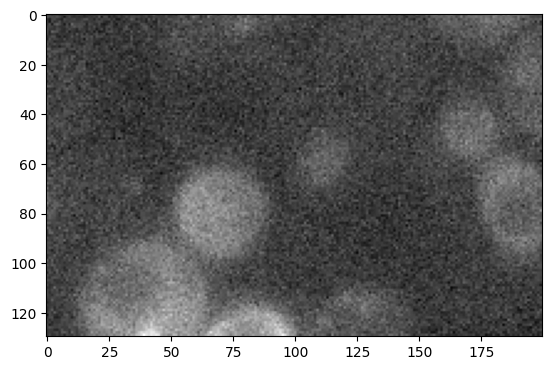

In [ ]:
cropped_noisy = cropped + 100*noise_image
plt.imshow(cropped_noisy,cmap='gray')

In [ ]:
image2 = skimage.io.imread('/content/drive/MyDrive/test.jpg')

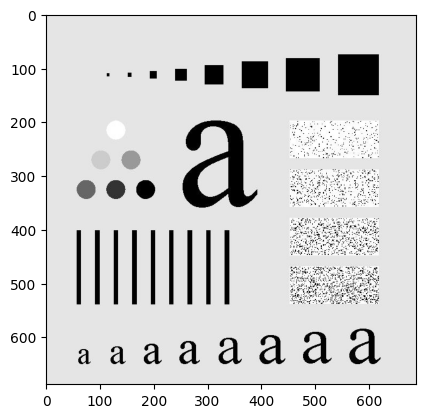

In [ ]:
plt.imshow(image2,cmap='gray')

In [ ]:
import cv2

In [ ]:
fs = 15
filter = np.ones((fs,fs)) / fs**2
filter

array([[0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 

In [ ]:
mean_filtered = cv2.filter2D(image2,-1,filter)

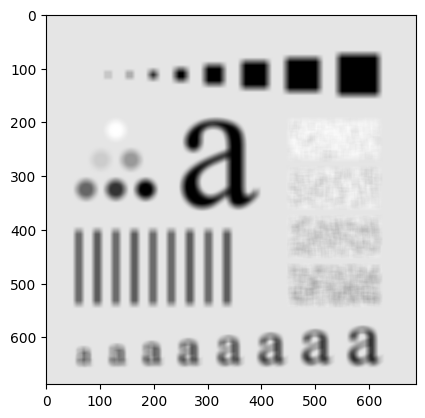

In [ ]:
plt.imshow(mean_filtered,cmap='gray')

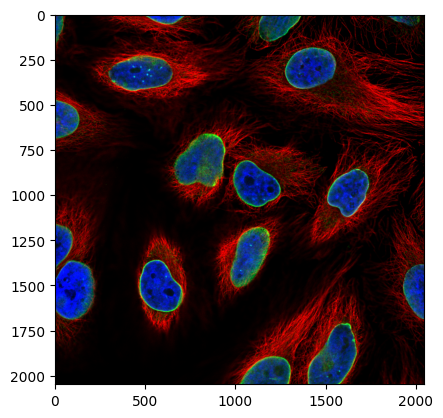

In [ ]:
Cimage = skimage.io.imread('/content/drive/MyDrive/image2.tif')
plt.imshow(Cimage,cmap='gray')

In [ ]:
Cimage.shape

(2048, 2048, 3)

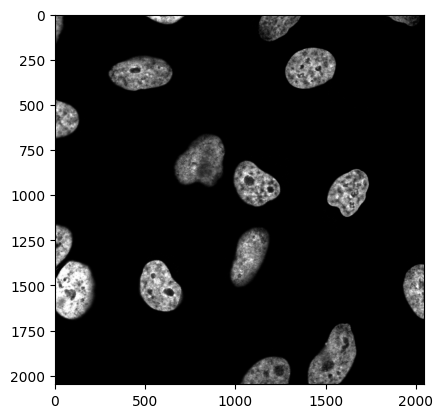

In [ ]:
plt.imshow(Cimage[:,:,2],cmap='gray')

(array([[1.409e+03, 2.660e+02, 2.160e+02, ..., 0.000e+00, 0.000e+00,
         5.000e+00],
        [1.411e+03, 2.560e+02, 2.280e+02, ..., 1.000e+00, 4.000e+00,
         0.000e+00],
        [1.414e+03, 2.440e+02, 2.410e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [1.810e+03, 1.690e+02, 5.400e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.825e+03, 1.670e+02, 4.200e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.815e+03, 1.780e+02, 4.300e+01, ..., 1.000e+00, 0.000e+00,
         0.000e+00]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 2048 BarContainer objects>)

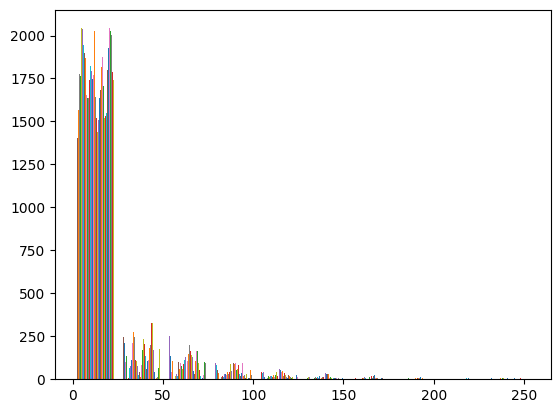

In [ ]:
channel1 = Cimage[:,:,1] # green
plt.hist(channel1)

### میزان رنگ سبز کانال1 در بازه 0-50 یه مقداری هست اما، در مقادیر بالاتر (پر رنگ تر سبز) رنگ سبز کم هست.

In [ ]:
image_nuclie = Cimage[:,:,2]

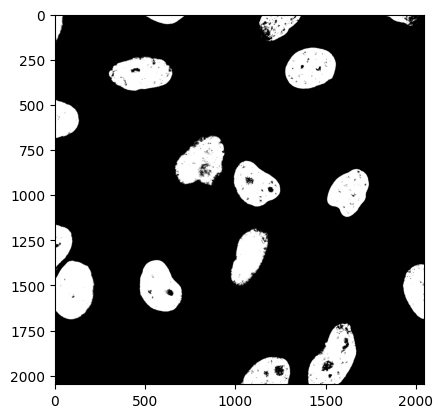

In [ ]:
mask = image_nuclie > 50 #treshold
plt.imshow(mask, cmap='gray')

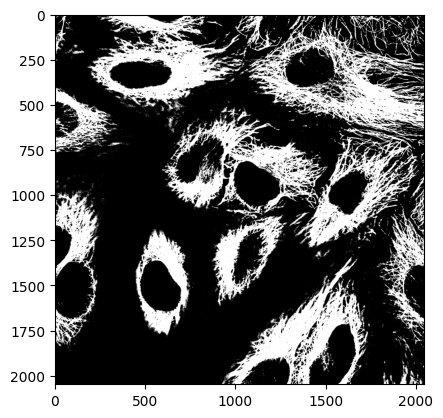

In [ ]:
image_body = Cimage[:,:,0]
mask = image_body > 40 #treshold
plt.imshow(mask, cmap='gray')

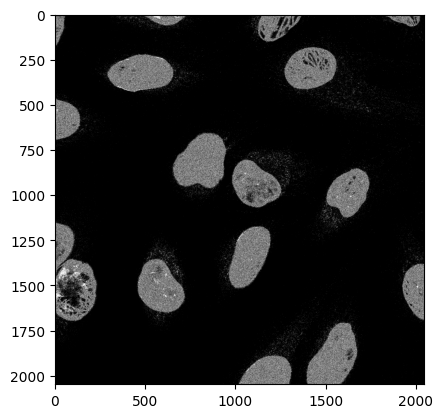

In [ ]:
both_mask = image_nuclie * image_body # multiple: جاهایی که بین این دو ماسک مشترک مشخص میکنه (دور سلول)
# sum: جاهایی که هر دو هستند. (اطراف و مرکز سلول)
plt.imshow(both_mask, cmap='gray')

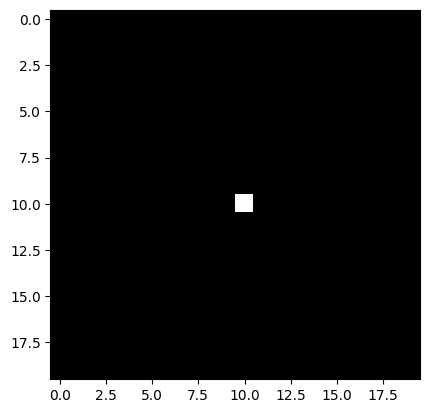

In [ ]:
image = np.zeros((20,20))
image[10,10] = 1
plt.imshow(image,cmap='gray')

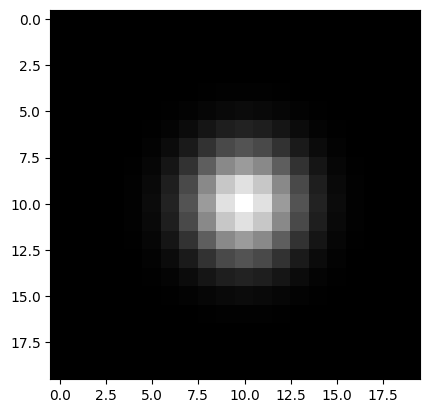

In [ ]:
filtered = skimage.filters.gaussian(image,sigma=2)
plt.imshow(filtered,cmap='gray')

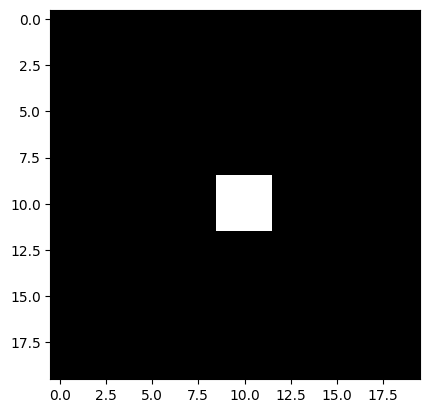

In [ ]:
fs = 3
filter = np.ones((fs,fs)) / fs**2

filtered = cv2.filter2D(image,-3,filter)
plt.imshow(filtered,cmap='gray')